# <center><a href='https://mybinder.org/v2/gh/fortierq/itc-binder/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Ffortierq%252Fitc1%26urlpath%3Dlab%252Ftree%252Fitc1%252Ffiles%252F2_tp_semestre1%252F8_matrice_image.ipynb%26branch%3Dmaster'>TP 8 : matrices et images <img src=https://mybinder.org/badge.svg></a></center>

## NumPy

Dans ce TP, on utilisera `numpy` pour représenter des matrices. 

In [2]:
import numpy as np

On peut créer une matrice de taille $n\times p$ remplie de $0$ avec `np.zeros((n,p))` :

In [3]:
m = np.zeros((2, 4))
m

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

On peut accéder et modifier l'élément sur la ligne $i$, colonne $j$ avec `m[i][j]` :

In [4]:
m[0][0] = 1 # modifie l'élément ligne 0, colonne 0 (en haut à gauche)
m

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.]])

**Exercice** : Écrire une fonction `identite` telle que `identite(n)` renvoie une matrice identité de taille $n\times n$.

Si `m` est une matrice, `len(m)` est son nombre de lignes et `len(m[0])` est son nombre de colonnes :

In [5]:
print(len(m)) # nombre de lignes
print(len(m[0])) # nombre de colonnes

2
4


On peut aussi utiliser `m.shape` pour obtenir les dimensions de la matrice (sous forme de tuple) :

In [6]:
m.shape # m est de dimension 2x4

(2, 4)

On peut parcourir une matrice avec deux boucles `for` (une boucle pour chaque indice) :

In [7]:
for i in range(len(m)): # parcourt les lignes
    for j in range(len(m[0])): # parcourt les colonnes
        m[i][j] = i + j # modifie la matrice

m

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.]])

**Exercice** : Écrire une fonction pour calculer la somme de tous les éléments d'une matrice, en complétant le code ci-dessous.

In [8]:
def somme(m):
    s = 0
    for i in ...:
        for j in ...:
            ...
    return s

somme(m) # test

TypeError: 'ellipsis' object is not iterable

Il est possible d'effectuer une opération (`+`, `*`...) directement sur deux matrices (ou une matrice et un scalaire) :

In [9]:
m1 = np.array([[7, 2, 5], [1, 5, 6]]) # définition d'une matrice
m2 = np.array([[7, 0, 1], [6, 11, 12]]) # définition d'une autre matrice

m1 + m2 # addition de deux matrices

array([[14,  2,  6],
       [ 7, 16, 18]])

Dans l'exemple ci-dessus, on a effectué l'opération :
$$\begin{pmatrix} 7& 2& 5 \\ 1 & 5 & 6 \end{pmatrix} + \begin{pmatrix} 7 & 0 & 1 \\ 6 & 11 & 12 \end{pmatrix} = \begin{pmatrix} 14 & 2 &6 \\ 7 & 16 & 18 \end{pmatrix}$$

**Exercice** : Écrire une fonction `add` telle que `add(M, p)` renvoie la matrice $pM = \underbrace{M + M + ... + M}_p$.

## Images

Une image est constituée d'un rectangle de pixels, chaque pixel ayant une couleur uniforme représenté par un nombre entier.  
En Python, on utilise généralement un tableau `numpy` à $3$ dimensions pour stocker une image.  
Voici un exemple :

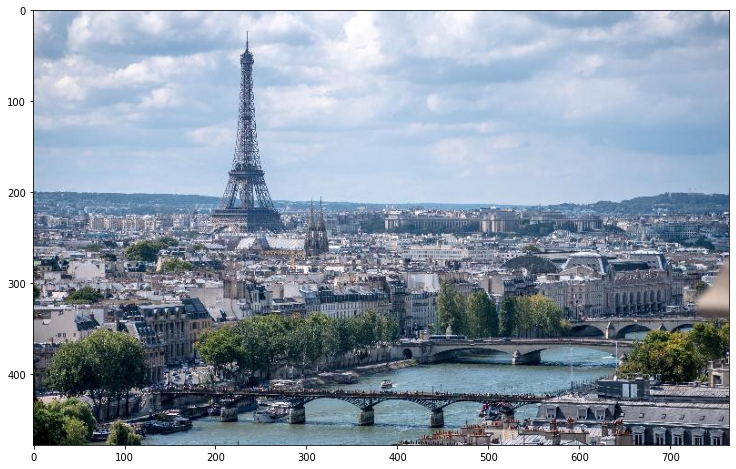

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8) # modifie la taille des figures

m = plt.imread("paris.jpg") # m est un tableau numpy contenant les pixels de l'image
m = m.astype(int)
plt.imshow(m); # afficher une image

In [11]:
m.shape # taille de l'image

(478, 765, 3)

La ligne précédente montre que `m` est de taille $478 \times 765 \times 3$, ce qui signifie que l'image fait $478$ pixels de hauteur, $765$ pixels de largeur et que chaque pixel possède 3 niveaux de couleurs (rouge, vert et bleu, ou RGB), un niveau de couleur étant un nombre entier compris entre 0 (absence de couleur) et 255 (couleur complètement présente).  
Par exemple, un pixel avec des niveaux RGB de $(255, 0, 0)$ est complètement rouge. Un pixel avec des niveaux RGB de $(255, 255, 0)$ est un mélange de rouge et de vert, c'est-à-dire du jaune.  
On accède à un pixel avec `m[i][j]` :

In [12]:
m[12][763] # pixel sur la ligne 12, colonne 763

array([149, 169, 194])

Ainsi, le pixel sur la ligne $12$, colonne $763$, possède des valeurs RGB égales à $(149, 169, 194)$. Le pixel de coordonnées $(0, 0)$ est celui en haut à gauche. Mettons du rouge sur un carré $100\times 100$ en haut à gauche :

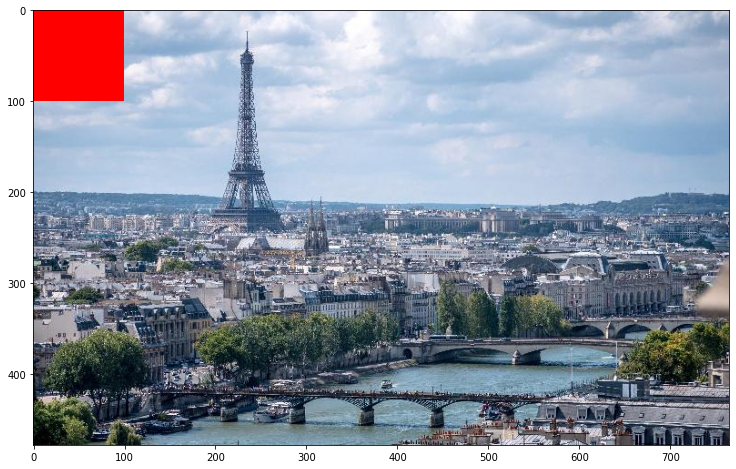

In [13]:
m_red = m.copy()

for i in range(100):
    for j in range(100):
        m_red[i][j] = np.array([255, 0, 0]) # on mets les pixels en rouge

plt.imshow(m_red);

**Exercice** : Cacher la tour Eiffel en mettant un rectangle dessus.

## Inversion des couleurs

On peut inverser les couleurs d'une images en remplaçant chaque niveau de couleur $c$ par $255 - c$ :

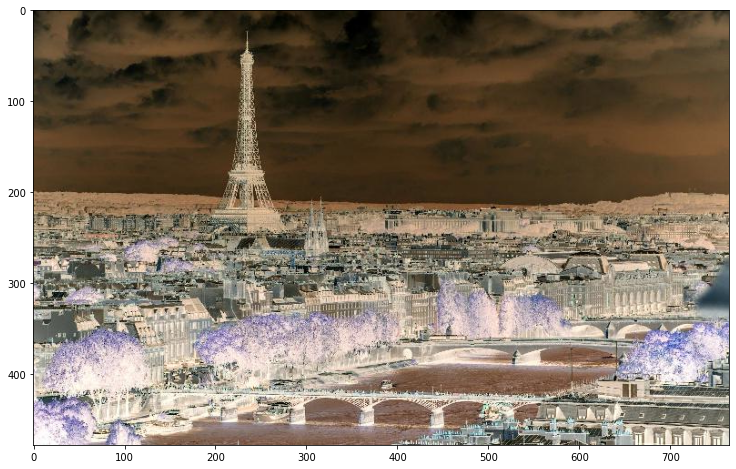

In [14]:
def inverse(m):
    res = 255 - m
    return res

plt.imshow(inverse(m));

**Exercice** : Inverser les couleurs d'une image pour obtenir l'image ci-dessus.

## Rotation

**Exercice** : Faire une rotation sur une image, comme sur l'exemple ci-dessous. On pourra s'inspirer du code ci-dessous :
```python
def rotation(m):
    m_rot = np.zeros((len(m[0]), len(m)), dtype=np.uint8) # crée une matrice dont le nombre de lignes est le nombre de colonnes de m, et inversement
    for i in range(len(m)):
        for j in range(len(m[0])):
            # remplir m_rot[j][i]
    return m_rot
plt.imshow(rotation(m)); # affichage du résultat
```

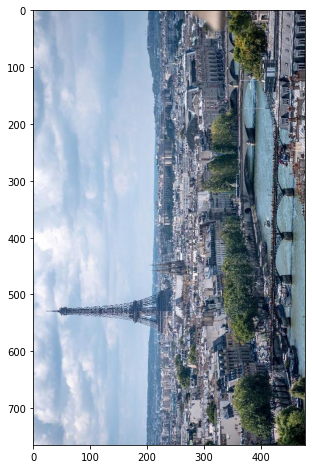

In [15]:
def rotation(m):
    res = np.rot90(m)
    return res

plt.imshow(rotation(m));

## Redimensionnement

On peut réduire la taille d'une image en divisant sa largeur et sa hauteur par un facteur $k$ :

**Exercice** : Compléter le code suivant.

In [16]:
def reduction(m, k): # divise largeur et hauteur par k
    m_red = np.zeros((len(m)//k, len(m[0])//k, 3), dtype=int) # matrice de taille divisée par k
    for i in range(len(m_red)):
        for j in range(len(m_red[0])):
            m_red[i][j] = ...
    return m_red

plt.imshow(reduction(m, 20));

TypeError: int() argument must be a string, a bytes-like object or a number, not 'ellipsis'

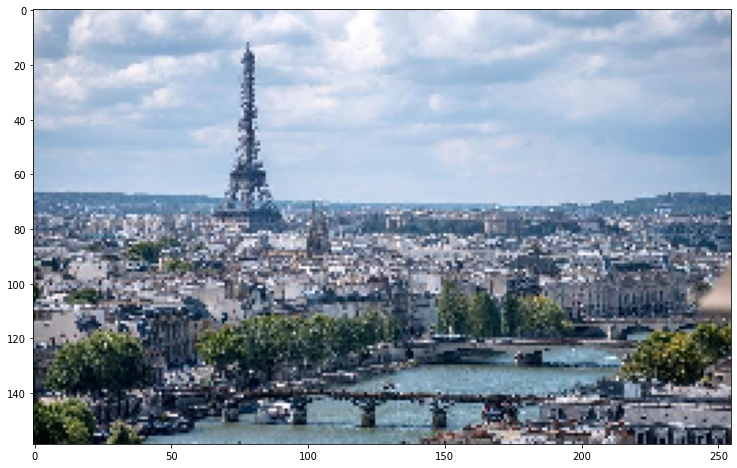

In [17]:
def reduction(m, k): # divise largeur et hauteur par k
    m_red = np.zeros((len(m)//k, len(m[0])//k, 3), dtype=np.uint8) # matrice de taille divisée par k
    for i in range(len(m_red)):
        for j in range(len(m_red[0])):
            m_red[i][j] = m[i*k][j*k]
    return m_red

plt.imshow(reduction(m, 3));

**Exercice** : Faire de même pour augmenter la résolution de l'image.

## Convolution

En modifiant chaque pixel par la moyenne des 9 pixels adjacents, on peut faire un effet de flou. Il faut cependant faire attention à ne pas dépasser les bords de l'image.

**Exercice** : Compléter la fonction moyenne suivante telle que, si `m` est une matrice, `moyenne(m, i, j)` renvoie la moyenne des pixels adjacents.

In [17]:
def moyenne(m, i, j):
    n = 0
    moy = 0
    for k in [i - 1, i, i + 1]:
        for l in [j - 1, j, j + 1]:
            if -1 < k < len(m) and -1 < l < len(m[0]):
                moy += m[k][l]
                n += 1
    return moy/n

**Exercice** : En déduire une fonction `flou` telle que `flou(m)` renvoie une image obtenue en prenant la moyenne de chaque pixel dans `m`. Essayer d'appliquer plusieurs fois `flou`.

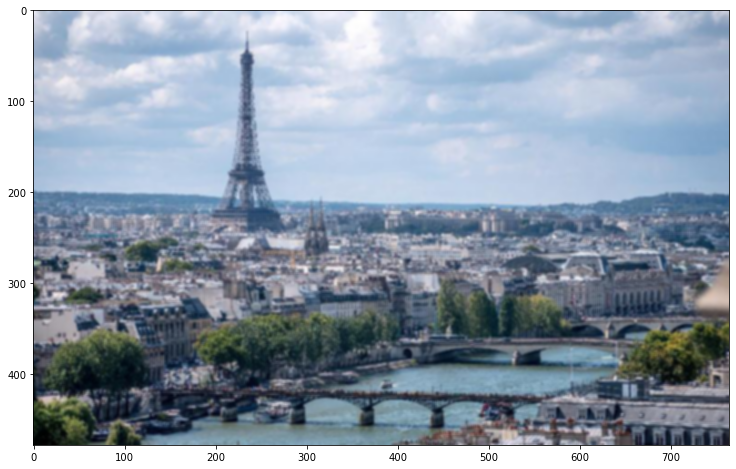

In [18]:
def flou(m):
    m_flou = m.copy()
    for i in range(len(m)):
        for j in range(len(m[0])):
            m_flou[i][j] = (moyenne(m, i, j))
    return m_flou

plt.imshow(flou(flou(m)));